In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [28]:
print(url)

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


In [29]:
df = pd.read_csv(url)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)

Name - 탑승객 성명

Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)

Sex - 성별

Age - 나이(세)

SibSp - 함께 탑승한 형제자매, 배우자 수 총합

Parch - 함께 탑승한 부모, 자녀 수 총합

Embarked - 탑승 항구

Fare - 탑승 요금

Ticket - 티켓 넘버

Cabin - 객실 넘버

In [30]:
# 2) 데이터에 대한 크기 확인/ 기본 정보
# 데이터의 크기(Rangelndex) - 891개
# 전체 컬럼(Data columns) - 12개
# (Non-Null Count) : Null(결측치) 을 가지고 있는 데이터는 Age, Cabin, Embarked
# Dtype : 데이터의 타입/자료구조
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [31]:
# 데이터의 상위 5개 행 확인
print(df.head())
# 데이터 크기 확인
print(df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [ ]:
# 2) 데이터 기본 처리

# 1. 머신러닝에서는 기본적으로 문자를 왠만하면 사용하지 않는다.
# -> 문자로 되어있는 것은 숫자로 변경한다. 아니면 제거를 한다.

# 2. 머신러닝에서는 결측치는 왠만하면 허용하지 않는다. -> 계산을 할때에 오류가 날 수 있기 때문
# -> 1 + NaN -> NaN -> 제거를 하거나 대체를 한다.

# 3. 그룹화분석 (groupby) 머신러닝 모델이 어떻게 예측될지를 미리 판단해보는 것도 중요
# -> 남성 생존확률 20% / 여성 생존확률 80%
# -> 머신러닝에서도 여성이 더 높은 가중치를 부여받아서 높은 확률로

In [33]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [34]:
df_new = df[['Name','Age','Sex']]

In [36]:
print(df.isnull().sum())

print(df.groupby('Sex')['Survived'].mean())

print(df.groupby('Pclass')['Survived'].mean())

print(df.groupby(['Sex','Pclass'])['Survived'].mean())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


In [37]:
# 1. 데이터 분할 (학습 70: 테스트 30)
from sklearn.model_selection import train_test_split
# 2. 모델을 불러오는 함수 - 로지스틱 회귀모델
from sklearn.linear_model import LogisticRegression
# 3. 정확도, 혼동행렬, 분류 리포트
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [38]:
df_n = df[['Survived','Pclass','Sex','Age','Fare']]

In [ ]:
print(df_n)
print(df_n.info())s

     Survived  Pclass     Sex   Age     Fare
0           0       3    male  22.0   7.2500
1           1       1  female  38.0  71.2833
2           1       3  female  26.0   7.9250
3           1       1  female  35.0  53.1000
4           0       3    male  35.0   8.0500
..        ...     ...     ...   ...      ...
886         0       2    male  27.0  13.0000
887         1       1  female  19.0  30.0000
888         0       3  female   NaN  23.4500
889         1       1    male  26.0  30.0000
890         0       3    male  32.0   7.7500

[891 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+

In [40]:
df_n.dropna(axis=0, inplace=True)

/tmp/ipython-input-2961513689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.dropna(axis=0, inplace=True)


In [41]:
df_n['Sex'] = df_n['Sex'].map({'male': 0, 'female' : 1})

/tmp/ipython-input-1629544110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['Sex'] = df_n['Sex'].map({'male': 0, 'female' : 1})


In [42]:
print(df_n)

     Survived  Pclass  Sex   Age     Fare
0           0       3    0  22.0   7.2500
1           1       1    1  38.0  71.2833
2           1       3    1  26.0   7.9250
3           1       1    1  35.0  53.1000
4           0       3    0  35.0   8.0500
..        ...     ...  ...   ...      ...
885         0       3    1  39.0  29.1250
886         0       2    0  27.0  13.0000
887         1       1    1  19.0  30.0000
889         1       1    0  26.0  30.0000
890         0       3    0  32.0   7.7500

[714 rows x 5 columns]


In [43]:
X = df_n.drop('Survived', axis = 1)
y = df_n['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=2025)

In [45]:
print(X_train)

     Pclass  Sex   Age     Fare
421       3    0  21.0   7.7333
10        3    1   4.0  16.7000
248       1    0  37.0  52.5542
854       2    1  44.0  26.0000
723       2    0  50.0  13.0000
..      ...  ...   ...      ...
262       1    0  52.0  79.6500
401       3    0  26.0   8.0500
637       2    0  31.0  26.2500
741       1    0  36.0  78.8500
722       2    0  34.0  13.0000

[499 rows x 4 columns]


In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7767441860465116


In [48]:
print(confusion_matrix(y_test, y_pred))

[[104  20]
 [ 28  63]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       124
           1       0.76      0.69      0.72        91

    accuracy                           0.78       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.78      0.78      0.78       215



In [50]:
# 지도학습 - 분류 모델에 주로 사용되는 모델!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    'KNN' : KNeighborsClassifier(),
    '의사결정나무' : DecisionTreeClassifier(),
    '랜덤포레스트' : RandomForestClassifier(),
    'XGboost' : XGBClassifier(),
    'LightGBM' : LGBMClassifier()
}

In [51]:
# model.fit(X_train, y_train) # 실제 모델 학습 아까 70% 데이터로 학습
# y_pred = model.predict(X_test)

# 똑같은 데이터를 가지고 모델을 수행! - 모델에 따라 결과가 천차만별
# 로지스틱 회귀모델 0.77
# 의사결정나무 0.76
# KNN 0.69
# 랜덤포레스트 0.8
# XGBoost 0.809
# LightGBM 0.823 (o -> 가장 정확도가 좋음)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))

KNN
0.6930232558139535
의사결정나무
0.772093023255814
랜덤포레스트
0.813953488372093
XGboost
0.8093023255813954
[LightGBM] [Info] Number of positive: 199, number of negative: 300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 499, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398798 -> initscore=-0.410478
[LightGBM] [Info] Start training from score -0.410478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [53]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(scores.mean())

[0.72727273 0.81818182 0.81818182 0.78321678 0.85915493]
0.8012016152861223


In [54]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes = np.linspace(0.1, 1.0, 5), random_state = 42
)

In [56]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

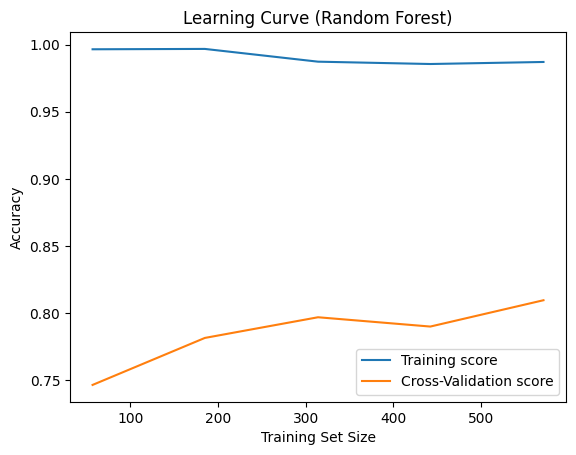

In [57]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Random Forest)")
plt.legend()
plt.show()